# Customer Segmentation for Marketing Strategy Success

## 1.0 Libraries

In [27]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

import matplotlib.pyplot as plt

## 2.0 Data understanding

### 2.1 Data dictionary

*CUSTID* : Identification of Credit Card holder (Categorical) </br>
*BALANCE* : Balance amount left in their account to make purchases</br>
*BALANCEFREQUENCY* : How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) </br>
*PURCHASES* : Amount of purchases made from account </br>
*ONEOFFPURCHASES* : Maximum purchase amount done in one-go </br>
*INSTALLMENTSPURCHASES* : Amount of purchase done in installment </br>
*CASHADVANCE* : Cash in advance given by the user </br>
*PURCHASESFREQUENCY* : How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) </br>
*ONEOFFPURCHASESFREQUENCY* : How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) </br>
*PURCHASESINSTALLMENTSFREQUENCY* : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) </br>
*CASHADVANCEFREQUENCY* : How frequently the cash in advance being paid </br>
*CASHADVANCETRX* : Number of transactions made with "Cash in Advanced" </br>
*PURCHASESTRX* : Numbe of purchase transactions made </br>
*CREDITLIMIT* : Limit of credit Card for user </br>
*PAYMENTS* : Amount of payment done by user </br>
*MINIMUM_PAYMENTS* : Minimum amount of payments made by user </br>
*PRCFULLPAYMENT* : Percent of full payment paid by user </br>
*TENURE* : Tenure of credit card service for user </br>

### 2.2 Data ingestion

* Load the dataset

In [2]:
df_raw = pd.read_csv('data/CC GENERAL.csv')

* Normalize column names

In [3]:
df_raw.columns = df_raw.columns.str.lower().str.replace(' ', '_')

* Normalize text values

In [4]:
string_columns = list(df_raw.dtypes[df_raw.dtypes=='object'].index)

for col in string_columns:
    df_raw[col] = df_raw[col].str.lower().str.replace(' ', '_')

### 2.2 Data description

In [5]:
df2 = df_raw.copy()

### 2.2.1 Data dimension

In [6]:
print('This dataset has {} rows ans {} columns.'.format(*df2.shape))

This dataset has 8950 rows ans 18 columns.


### 2.2.2 Check the column data types

In [7]:
pd.DataFrame(df2.dtypes, columns=['data type'])

,data type
cust_id,object
balance,float64
balance_frequency,float64
purchases,float64
oneoff_purchases,float64
installments_purchases,float64
cash_advance,float64
purchases_frequency,float64
oneoff_purchases_frequency,float64
purchases_installments_frequency,float64


### 2.2.3 Descriptive statistics

#### 2.2.3.4 Categorical features

* cust_id

In [8]:
stats = df2.describe(include='object')
stats.loc['# of duplicated values'] = [sum(df2.duplicated(subset=col)) for col in stats.columns]
stats.T

,count,unique,top,freq,# of duplicated values
cust_id,8950,8950,c10001,1,0


* character from cust_id

In [9]:
df2['cust_id_letter'] = df2['cust_id'].str.extract(r'([a-z]+)')
df2['cust_id_numbers'] = df2['cust_id'].str.extract(r'(\d+)').astype(int)

In [10]:
df2['cust_id_letter'].value_counts()

c    8950
Name: cust_id_letter, dtype: int64

#### 2.2.3.5 Numerical features

In [11]:
stats = df2.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

stats.loc['skewness'] = df2.skew(numeric_only=True).tolist()
stats.loc['kurtosis'] = df2.kurtosis(numeric_only=True).tolist()
stats.loc['unique'] = [len(df2[col].unique()) for col in stats.columns]
stats.loc['# of nan values'] = df2.isna().sum()#.tolist()
stats.round(decimals=2).T.sort_values(by='max', ascending=False)

,count,mean,std,min,5%,25%,50%,75%,95%,max,skewness,kurtosis,unique,# of nan values
minimum_payments,8637.0,864.21,2372.45,0.02,73.28,169.12,312.34,825.49,2766.56,76406.21,13.62,283.99,8637.0,313.0
payments,8950.0,1733.14,2895.06,0.00,89.99,383.28,856.90,1901.13,6082.09,50721.48,5.91,54.77,8711.0,0.0
purchases,8950.0,1003.20,2136.63,0.00,0.00,39.64,361.28,1110.13,3998.62,49039.57,8.14,111.39,6203.0,0.0
cash_advance,8950.0,978.87,2097.16,0.00,0.00,0.00,0.00,1113.82,4647.17,47137.21,5.17,52.90,4323.0,0.0
oneoff_purchases,8950.0,592.44,1659.89,0.00,0.00,0.00,38.00,577.40,2671.09,40761.25,10.05,164.19,4014.0,0.0
credit_limit,8949.0,4494.45,3638.82,50.00,1000.00,1600.00,3000.00,6500.00,12000.00,30000.00,1.52,2.84,206.0,1.0
installments_purchases,8950.0,411.07,904.34,0.00,0.00,0.00,89.00,468.64,1750.09,22500.00,7.30,96.58,4452.0,0.0
cust_id_numbers,8950.0,14600.04,2651.31,10001.00,10464.35,12307.25,14598.50,16899.75,18732.55,19190.00,-0.00,-1.20,8950.0,0.0
balance,8950.0,1564.47,2081.53,0.00,8.81,128.28,873.39,2054.14,5909.11,19043.14,2.39,7.67,8871.0,0.0
purchases_trx,8950.0,14.71,24.86,0.00,0.00,1.00,7.00,17.00,57.00,358.00,4.63,34.79,173.0,0.0


In [41]:
sum(df2['balance']>df2['credit_limit'])

227

In [45]:
cond = df2['balance']>df2['credit_limit']
sum(df2[cond]['balance']-df2[cond]['credit_limit'])/df2[cond].shape[0]

153.19239961674

### 2.3 Data exploration

## 3.0 Data Preparation

In [12]:
df3 = df2.copy()

### 3.1 Dealing with missing values

In [13]:
df3 = df3.dropna()

In [15]:
sum(df3.isna().sum())

0

In [16]:
df3.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure', 'cust_id_letter',
       'cust_id_numbers'],
      dtype='object')

### 3. Feature selection

In [18]:
cols_drop = ['cust_id', 'cust_id_numbers', 'cust_id_letter']
X = df3.drop(columns=cols_drop)

## 4.0 Modeling

### 4.1 $k$-means

In [36]:
%%time

clusters = range(2, 10, 1)

silhouette_list = []
db_index_list = []

for k in clusters:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    labels = kmeans_model.predict(X)
    
    sil = silhouette_score(X, labels)
    dbs = davies_bouldin_score(X, labels)
    
    silhouette_list.append(sil)
    db_index_list.append(dbs)

CPU times: user 39.5 s, sys: 15.6 s, total: 55.1 s
Wall time: 18.8 s


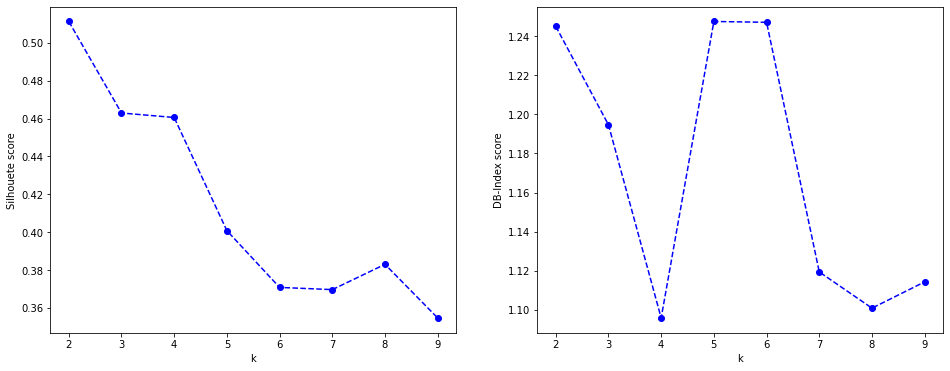

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].plot(clusters, silhouette_list, linestyle='--', marker='o', color='b')
ax[1].plot(clusters, db_index_list, linestyle='--', marker='o', color='b')

ax[0].set_xlabel('k')
ax[0].set_ylabel('Silhouete score')

ax[1].set_xlabel('k')
ax[1].set_ylabel('DB-Index score')

plt.show()

## 5.0 Evaluation

## 6.0 Deployment